In [2]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import librosa 
import math 


In [6]:
# path to json 
DATA_PATH = "data_10.json"

def load_data(DATA_PATH):

    with open(DATA_PATH, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    x = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded")

    return x, y


In [7]:
# load data 
X, y = load_data(DATA_PATH)

X.shape

Data succesfully loaded


(9996, 130, 13)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.3)

# Simple ANN

## Activation function:
### relu fucntion:
"ReLU" stands for "Rectified Linear Unit" and is a popular activation function used in deep learning models, including those built with Keras.
The ReLU activation function is preferred over other activation functions such as sigmoid and tanh because it is computationally efficient and 
allows for faster convergence during training. It is also less prone to the vanishing gradient problem, which can occur when using sigmoid or 
tanh activation functions in deep neural networks.

### softmax function
The softmax activation function is a commonly used activation function in neural networks, particularly in the output layer of classification 
models. It converts a vector of arbitrary real values into a probability distribution, meaning that the sum of the outputs is equal to 1.0.

In [13]:
 # building network topology 
model = keras.Sequential([

    #input layer
    keras.layers.Flatten(input_shape = (X.shape[1], X.shape[2])),

    #1st dense layer
    keras.layers.Dense(512, activation="relu"),

    #2nd dense layer
    keras.layers.Dense(256, activation="relu"),

    #3nd dense layer
    keras.layers.Dense(64, activation="relu"),

    #4nd dense layer
    keras.layers.Dense(16, activation="softmax")

])

# Optimizer:
Adam (Adaptive Moment Estimation) is a popular optimization algorithm used in deep learning models, including those built with Keras. The Adam optimizer combines the benefits of two other optimization algorithms: AdaGrad and RMSProp.
The Adam optimizer adapts the learning rate for each parameter in the network based on the gradient of the loss function and a running estimate of the second moment of the gradients. This allows it to converge quickly and efficiently to a solution, especially for large and complex models.

Adam also includes bias correction, which makes it more stable during early training stages. Additionally, it is less sensitive to hyperparameter choices than other optimization algorithms such as stochastic gradient descent (SGD).

Overall, Adam is a good choice of optimizer for most deep learning applications and is often the default choice in Keras.

In [20]:
# compose model 
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(
    optimizer = optimiser,
    loss = 'sparse_categorical_crossentropy',
    metrics =['accuracy'] 
)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1690)              0         
                                                                 
 dense (Dense)               (None, 512)               865792    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 16)                1040      
                                                                 
Total params: 1,014,608
Trainable params: 1,014,608
Non-trainable params: 0
_________________________________________________________________


In [30]:
# train model

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)

Epoch 1/50
219/219 [==============================] - 3s 13ms/step - loss: 0.1418 - accuracy: 0.9557 - val_loss: 2.6739 - val_accuracy: 0.5889
Epoch 2/50
219/219 [==============================] - 3s 13ms/step - loss: 0.1006 - accuracy: 0.9650 - val_loss: 2.7829 - val_accuracy: 0.5922
Epoch 3/50
219/219 [==============================] - 3s 13ms/step - loss: 0.1198 - accuracy: 0.9614 - val_loss: 2.8838 - val_accuracy: 0.5989
Epoch 4/50
219/219 [==============================] - 3s 14ms/step - loss: 0.0815 - accuracy: 0.9707 - val_loss: 2.9306 - val_accuracy: 0.5959
Epoch 5/50
219/219 [==============================] - 3s 14ms/step - loss: 0.0732 - accuracy: 0.9746 - val_loss: 2.7907 - val_accuracy: 0.6002
Epoch 6/50
219/219 [==============================] - 3s 13ms/step - loss: 0.0741 - accuracy: 0.9747 - val_loss: 3.3047 - val_accuracy: 0.5809
Epoch 7/50
219/219 [==============================] - 3s 14ms/step - loss: 0.2281 - accuracy: 0.9225 - val_loss: 2.9927 - val_accuracy: 0.5649

In [31]:
import matplotlib.pyplot as plt


def plot_history(h):

    fig, axs = plt.subplots(2)

    #create accuracy subplot
    axs[0].plot(h.history["accuracy"], label = "train accuarcy")
    axs[0].plot(h.history["val_accuracy"], label = "test accuarcy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy level")

    #create error subplot 
    axs[1].plot(h.history["loss"], label = "train error")
    axs[1].plot(h.history["val_loss"], label = "test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()



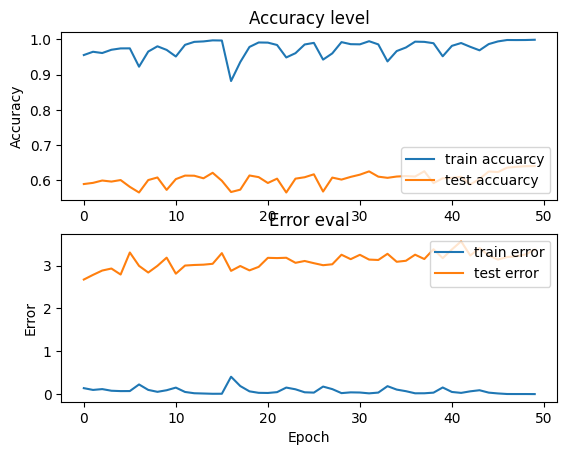

In [32]:
plot_history(history)

# Managing Overfitting:

In [ ]:
print("test commit")